## This notebook is for new data in the form of separate CSV, JSON and or Tiffs 
of cores for Lina Wik and Arne Ö data

### to get d90s go to [difference of 90th percentiles](#d90s)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utils
import importlib
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

In [2]:
#create a little function to change names to the style #_#_#
#could be done with regex but..... when you have a problem, use regex and now you have two problems
def renameImage(astring):
    astring=astring.replace("TMA","")
    pieces1st=astring.split("_")
    tma=pieces1st[0]
    pieces2nd=pieces1st[2].split(".")
    loc1=pieces2nd[1][:-1]
    loc2=pieces2nd[1][-1]
    return f"{tma}_{loc1}_{loc2}"   

In [3]:
#check for resolution carefully
resolution=0.4961

In [5]:
#join all the trimmed CSV
#remember to change the mu character
#location of the CSV
loc="/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/new20cores/CSV/"
files= ["TMA6_2_Core1.3C.csv", "TMA6_2_Core1.3D.csv", "TMA6_2_Core1.3F.csv", "TMA6_2_Core1.7D.csv", "TMA6_2_Core1.9B.csv", "TMA6_2_Core1.9D.csv", "TMA6_2_Core1.9F.csv", "TMA6_2_Core1.9H.csv", "TMA6_2_Core1.9I.csv", "TMA7_2_Core1.10B.csv", "TMA7_2_Core1.12C.csv", "TMA7_2_Core1.3F.csv", "TMA7_2_Core1.3H.csv", "TMA7_2_Core1.4B.csv", "TMA7_2_Core1.5G.csv", "TMA7_2_Core1.6H.csv", "TMA7_2_Core1.7C.csv", "TMA7_2_Core1.7F.csv", "TMA7_2_Core1.8E.csv", "TMA7_2_Core1.8I.csv"]
alldf={}
for i in files:
    newname=renameImage(i)
    #print(loc+"DetectionResults_"+i+".csv")
    alldf[i]=pd.read_csv(f"{loc}{i}")
    alldf[i]["Image"]=newname
    alldf[i]["global_id"]=alldf[i].index.values

In [6]:
result = pd.concat(alldf)
result = result.reset_index()


# Now, are these for training or to go to inference directly?

### If training: continue along. Else if inference: go below to where it says [inference](#Inference)

In [11]:
#temp erase
csvloc="/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/trimmed/d90s/"
result= pd.read_csv(csvloc+"FCN_models/properAugmentation/results/allcellswithFCNlabelsandqualtyProperAugmodelsBestTrainloss.csv")

In [16]:
#temp erase
colsallseraselater=""
for i in result.columns:
    colsallseraselater+=" "+i
print(colsallseraselater)

 cx cy Image global_id 12d90s 13d90s 14d90s 15d90s 16d90s 17d90s 18d90s 23d90s 24d90s 25d90s 26d90s 27d90s 28d90s 34d90s 35d90s 36d90s 37d90s 38d90s 45d90s 46d90s 47d90s 48d90s 56d90s 57d90s 58d90s 67d90s 68d90s 78d90s 3DUMX Class combination combination_length colorpercell geometry nucleusGeometry Cell: DAPI mean Cell: DAPI std dev Cell: DAPI max Cell: DAPI min Cell: IBA1 mean Cell: IBA1 std dev Cell: IBA1 max Cell: IBA1 min Cell: Ki67 mean Cell: Ki67 std dev Cell: Ki67 max Cell: Ki67 min Cell: TMEM119 mean Cell: TMEM119 std dev Cell: TMEM119 max Cell: TMEM119 min Cell: NeuroC mean Cell: NeuroC std dev Cell: NeuroC max Cell: NeuroC min Cell: MBP mean Cell: MBP std dev Cell: MBP max Cell: MBP min Cell: mutIDH1 mean Cell: mutIDH1 std dev Cell: mutIDH1 max Cell: mutIDH1 min Cell: CD34 mean Cell: CD34 std dev Cell: CD34 max Cell: CD34 min Cell: GFAP mean Cell: GFAP std dev Cell: GFAP max Cell: GFAP min Cell: Autofluorescence mean Cell: Autofluorescence std dev Cell: Autofluorescence max C

In [17]:
#temp erase
result.isna().any()

cx                                False
cy                                False
Image                             False
global_id                         False
12d90s                            False
13d90s                            False
14d90s                            False
15d90s                            False
16d90s                            False
17d90s                            False
18d90s                            False
23d90s                            False
24d90s                            False
25d90s                            False
26d90s                            False
27d90s                            False
28d90s                            False
34d90s                            False
35d90s                            False
36d90s                            False
37d90s                            False
38d90s                            False
45d90s                            False
46d90s                            False
47d90s                            False


In [8]:
cols=[x for x in result.columns]

In [ ]:
# work in image coordinates since we are going to search for things in the image
result["cx"]=result['Centroid X mum']/resolution
result["cy"]=result['Centroid Y mum']/resolution

In [1]:
combvalues={"GFAP":1,"mutIDH1":2,"NeuroC":4,"TMEM119":8,"IBA1":16,"CD34":32,"MBP":64,"Ki67":128,
                "ambiguous":256}
markers=["GFAP","mutIDH1","NeuroC","TMEM119","IBA1","CD34","MBP","Ki67"]

realcombcolors={1:"#2953b9",129:"#5574be",2:"#ff881f",3:"#d2a93b",6:"#ab8d40",7:"#925824",130:"#c3912d",
                131:"#ab672a",134:"#b67b2d",135:"#6f3909",4:"#ea86d5",8:"#ea2325",24:"#bb4b4b",136:"#bb4b4b",
                152:"#ad6666",16:"#9467bd",144:"#9f89b2",32:"#2699b1",160:"#78c1d0",128:"#35c135"}

celltype={1:"Astrocyte",129:"Astrocyte",2:"Glioma",3:"Glioma",6:"Glioma",7:"Glioma",130:"Glioma",
         131:"Glioma",134:"Glioma",135:"Glioma",4:"Neuron",8:"Microglia",24:"Microglia",
         136:"Microglia",152:"Microglia",16:"Macrophage",144:"Macrophage",32:"Endothelial",
         160:"Endothelial",256:"ambiguous"}

coldict={"Astrocyte":"#2953b9","Glioma":"#ff7f0e","Neuron":"#ea86d5",
         "Microglia":"#ea2325","Macrophage":"#9467bd","Endothelial":"#2699b1","ambiguous":"#aaaaaa"}

In [ ]:
combs=[]
comblengths=[]
colvals=[]
celltypes=[]
maincolors=[]
result["combination"]=0
result["combination_length"]=0
result["colorpercell"]=0
result["CellType"]=0
result["maincolor"]=0

In [ ]:
for i, row in result.iterrows():
    classes=row["Class"]
        
    classes=classes.replace(" ","")
    classes=classes.split(":")
    comb=0
    for c in classes:
        comb+=combvalues[c]
    combs.append(comb)
    comblengths.append(len(classes))
    colvals.append(mycolor(comb))
    if comb in celltype:
        ct=celltype[comb]
        celltypes.append(ct)
        maincolors.append(coldict[ct])
    else:
        ct="ambiguous"
        celltypes.append(ct)
        maincolors.append("#aaaaaa")
        

result["combination"]=combs
result["combination_length"]=comblengths
result["colorpercell"]=colvals
result["CellType"]=celltypes
result["maincolor"]=maincolors

**Now it's ready with labels to save and go get d90s**

In [ ]:
result.to_csv("/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/detectionResultsTRimmedCores.csv",index=False)

# Inference
preproccessing for inference, where we have no labels

In [9]:
importlib.reload(utils)
utils.printColsAsString(result,wrap='"',sep=", ")

, "Image", "Centroid X mum", "Centroid Y mum", "Cell: Area", "Cell: Perimeter", "Cell: Circularity", "Cell: Max caliper", "Cell: Min caliper", "Cell: Eccentricity", "Cell: DAPI mean", "Cell: DAPI std dev", "Cell: DAPI max", "Cell: DAPI min", "Cell: IBA1 mean", "Cell: IBA1 std dev", "Cell: IBA1 max", "Cell: IBA1 min", "Cell: Ki67 mean", "Cell: Ki67 std dev", "Cell: Ki67 max", "Cell: Ki67 min", "Cell: TMEM119 mean", "Cell: TMEM119 std dev", "Cell: TMEM119 max", "Cell: TMEM119 min", "Cell: NeuroC mean", "Cell: NeuroC std dev", "Cell: NeuroC max", "Cell: NeuroC min", "Cell: MBP mean", "Cell: MBP std dev", "Cell: MBP max", "Cell: MBP min", "Cell: mutIDH1 mean", "Cell: mutIDH1 std dev", "Cell: mutIDH1 max", "Cell: mutIDH1 min", "Cell: CD34 mean", "Cell: CD34 std dev", "Cell: CD34 max", "Cell: CD34 min", "Cell: GFAP mean", "Cell: GFAP std dev", "Cell: GFAP max", "Cell: GFAP min", "Cell: Autofluorescence mean", "Cell: Autofluorescence std dev", "Cell: Autofluorescence max", "Cell: Autofluoresc

In [8]:
#drop useless columns
dropus=[ "level_0", "level_1", "Name", "Class", "Parent", "ROI", "Nucleus: Area", "Nucleus: Perimeter", "Nucleus: Circularity", "Nucleus: Max caliper", "Nucleus: Min caliper", "Nucleus: Eccentricity", "Nucleus: DAPI mean", "Nucleus: DAPI sum", "Nucleus: DAPI std dev", "Nucleus: DAPI max", "Nucleus: DAPI min", "Nucleus: DAPI range", "Nucleus: IBA1 mean", "Nucleus: IBA1 sum", "Nucleus: IBA1 std dev", "Nucleus: IBA1 max", "Nucleus: IBA1 min", "Nucleus: IBA1 range", "Nucleus: Ki67 mean", "Nucleus: Ki67 sum", "Nucleus: Ki67 std dev", "Nucleus: Ki67 max", "Nucleus: Ki67 min", "Nucleus: Ki67 range", "Nucleus: TMEM119 mean", "Nucleus: TMEM119 sum", "Nucleus: TMEM119 std dev", "Nucleus: TMEM119 max", "Nucleus: TMEM119 min", "Nucleus: TMEM119 range", "Nucleus: NeuroC mean", "Nucleus: NeuroC sum", "Nucleus: NeuroC std dev", "Nucleus: NeuroC max", "Nucleus: NeuroC min", "Nucleus: NeuroC range", "Nucleus: MBP mean", "Nucleus: MBP sum", "Nucleus: MBP std dev", "Nucleus: MBP max", "Nucleus: MBP min", "Nucleus: MBP range", "Nucleus: mutIDH1 mean", "Nucleus: mutIDH1 sum", "Nucleus: mutIDH1 std dev", "Nucleus: mutIDH1 max", "Nucleus: mutIDH1 min", "Nucleus: mutIDH1 range", "Nucleus: CD34 mean", "Nucleus: CD34 sum", "Nucleus: CD34 std dev", "Nucleus: CD34 max", "Nucleus: CD34 min", "Nucleus: CD34 range", "Nucleus: GFAP mean", "Nucleus: GFAP sum", "Nucleus: GFAP std dev", "Nucleus: GFAP max", "Nucleus: GFAP min", "Nucleus: GFAP range", "Nucleus: Autofluorescence mean", "Nucleus: Autofluorescence sum", "Nucleus: Autofluorescence std dev", "Nucleus: Autofluorescence max", "Nucleus: Autofluorescence min", "Nucleus: Autofluorescence range", "Cytoplasm: DAPI mean", "Cytoplasm: DAPI std dev", "Cytoplasm: DAPI max", "Cytoplasm: DAPI min", "Cytoplasm: IBA1 mean", "Cytoplasm: IBA1 std dev", "Cytoplasm: IBA1 max", "Cytoplasm: IBA1 min", "Cytoplasm: Ki67 mean", "Cytoplasm: Ki67 std dev", "Cytoplasm: Ki67 max", "Cytoplasm: Ki67 min", "Cytoplasm: TMEM119 mean", "Cytoplasm: TMEM119 std dev", "Cytoplasm: TMEM119 max", "Cytoplasm: TMEM119 min", "Cytoplasm: NeuroC mean", "Cytoplasm: NeuroC std dev", "Cytoplasm: NeuroC max", "Cytoplasm: NeuroC min", "Cytoplasm: MBP mean", "Cytoplasm: MBP std dev", "Cytoplasm: MBP max", "Cytoplasm: MBP min", "Cytoplasm: mutIDH1 mean", "Cytoplasm: mutIDH1 std dev", "Cytoplasm: mutIDH1 max", "Cytoplasm: mutIDH1 min", "Cytoplasm: CD34 mean", "Cytoplasm: CD34 std dev", "Cytoplasm: CD34 max", "Cytoplasm: CD34 min", "Cytoplasm: GFAP mean", "Cytoplasm: GFAP std dev", "Cytoplasm: GFAP max", "Cytoplasm: GFAP min", "Cytoplasm: Autofluorescence mean", "Cytoplasm: Autofluorescence std dev", "Cytoplasm: Autofluorescence max", "Cytoplasm: Autofluorescence min"]
result.drop(columns=dropus,inplace=True)

In [11]:
columnsorder=["Image","global_id", "Centroid X mum", "Centroid Y mum", "Cell: Area", "Cell: Perimeter", "Cell: Circularity", "Cell: Max caliper", "Cell: Min caliper", "Cell: Eccentricity", "Cell: DAPI mean", "Cell: DAPI std dev", "Cell: DAPI max", "Cell: DAPI min", "Cell: IBA1 mean", "Cell: IBA1 std dev", "Cell: IBA1 max", "Cell: IBA1 min", "Cell: Ki67 mean", "Cell: Ki67 std dev", "Cell: Ki67 max", "Cell: Ki67 min", "Cell: TMEM119 mean", "Cell: TMEM119 std dev", "Cell: TMEM119 max", "Cell: TMEM119 min", "Cell: NeuroC mean", "Cell: NeuroC std dev", "Cell: NeuroC max", "Cell: NeuroC min", "Cell: MBP mean", "Cell: MBP std dev", "Cell: MBP max", "Cell: MBP min", "Cell: mutIDH1 mean", "Cell: mutIDH1 std dev", "Cell: mutIDH1 max", "Cell: mutIDH1 min", "Cell: CD34 mean", "Cell: CD34 std dev", "Cell: CD34 max", "Cell: CD34 min", "Cell: GFAP mean", "Cell: GFAP std dev", "Cell: GFAP max", "Cell: GFAP min", "Cell: Autofluorescence mean", "Cell: Autofluorescence std dev", "Cell: Autofluorescence max", "Cell: Autofluorescence min", "Nucleus/Cell area ratio"]
result=result[columnsorder]
result

,Image,global_id,Centroid X mum,Centroid Y mum,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: DAPI mean,Cell: DAPI std dev,Cell: DAPI max,Cell: DAPI min,Cell: IBA1 mean,Cell: IBA1 std dev,Cell: IBA1 max,Cell: IBA1 min,Cell: Ki67 mean,Cell: Ki67 std dev,Cell: Ki67 max,Cell: Ki67 min,Cell: TMEM119 mean,Cell: TMEM119 std dev,Cell: TMEM119 max,Cell: TMEM119 min,Cell: NeuroC mean,Cell: NeuroC std dev,Cell: NeuroC max,Cell: NeuroC min,Cell: MBP mean,Cell: MBP std dev,Cell: MBP max,Cell: MBP min,Cell: mutIDH1 mean,Cell: mutIDH1 std dev,Cell: mutIDH1 max,Cell: mutIDH1 min,Cell: CD34 mean,Cell: CD34 std dev,Cell: CD34 max,Cell: CD34 min,Cell: GFAP mean,Cell: GFAP std dev,Cell: GFAP max,Cell: GFAP min,Cell: Autofluorescence mean,Cell: Autofluorescence std dev,Cell: Autofluorescence max,Cell: Autofluorescence min,Nucleus/Cell area ratio
0,6_3_C,0,849.59,213.77,51.50,28.9285,0.7733,11.2977,5.5000,0.8563,1.6376,1.6766,5.2573,0.0,2.2101,1.1150,4.3841,0.04,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,3.0687,0.9876,5.0874,0.4178,0.8691,0.7558,6.6413,0.3203,1.7213,0.4917,2.7207,0.1788,0.0118,0.0245,0.1346,0.0,0.4383,0.2079,1.0171,0.0682,2.8415,0.8313,4.5628,0.4431,0.2846
1,6_3_C,1,838.43,214.31,67.75,32.1508,0.8236,12.6503,6.6171,0.8587,3.4759,2.3859,7.6894,0.0,1.1199,0.7369,3.6012,0.00,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,4.8497,1.4627,9.8076,1.3199,0.6458,0.1764,1.2253,0.2141,2.0385,0.4583,3.0828,1.0927,0.0083,0.0202,0.1695,0.0,0.4227,0.1638,0.9700,0.1819,3.4925,0.9744,6.0601,1.0843,0.3017
2,6_3_C,2,915.14,216.52,113.75,39.6268,0.9103,13.3548,11.2382,0.3894,1.7278,1.7472,5.3302,0.0,1.4623,0.8423,4.7114,0.00,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,5.2985,1.6845,8.7516,0.8828,0.9149,0.7678,5.5747,0.1021,2.1910,0.7589,3.9562,0.2830,0.0120,0.0320,0.2760,0.0,0.3501,0.1631,0.8120,0.1024,3.3243,1.0581,6.1042,0.8093,0.4090
3,6_3_C,3,899.84,221.84,124.50,40.5844,0.9499,14.5215,10.8913,0.6618,1.3024,1.4805,6.4877,0.0,1.7208,1.3438,6.5149,0.00,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,4.5584,2.3335,11.3959,0.2406,2.1119,1.8631,7.6764,0.2061,1.6986,0.7069,4.6633,0.3837,0.0141,0.0273,0.1657,0.0,0.3665,0.2032,1.0199,0.0517,3.4466,1.0821,6.4833,0.9540,0.3939
4,6_3_C,4,834.78,222.36,68.50,31.8519,0.8485,11.1211,8.1125,0.6844,2.3187,2.3538,8.3139,0.0,0.6408,0.9049,4.3782,0.00,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,3.5135,1.3717,7.5765,0.3859,0.8434,0.2702,1.4580,0.2002,3.2692,1.3889,6.1688,0.2741,0.0266,0.0403,0.1961,0.0,0.5559,0.2541,1.1489,0.1018,3.8415,1.3497,7.0369,0.7210,0.4001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53852,7_8_I,3954,926.83,1170.50,101.25,36.9316,0.9328,13.2034,10.2498,0.6527,0.6750,0.6871,2.3653,0.0,0.5597,0.8972,3.6672,0.00,0.0,0.001,0.0198,0.0,0.0000,0.0002,0.0035,0.0,6.7960,1.1191,9.7814,3.7686,0.7591,0.2952,1.4301,0.0113,3.1999,1.0252,4.9467,0.9282,0.0164,0.0447,0.2573,0.0,0.4141,0.1109,0.7112,0.1951,4.3363,0.9083,7.5290,2.6735,0.4081
53853,7_8_I,3955,1006.00,1170.50,80.00,33.0043,0.9229,11.2095,9.3071,0.5002,0.7475,0.7284,2.3826,0.0,0.1089,0.2761,1.3383,0.00,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,6.6120,1.9707,10.6235,2.7211,0.7837,0.2838,1.5147,0.2670,2.3126,0.8079,4.2566,0.5793,0.0377,0.0464,0.3198,0.0,0.4422,0.2934,1.2882,0.0985,4.0625,0.9097,6.3638,1.9882,0.4191
53854,7_8_I,3956,1028.40,1169.80,76.25,33.5478,0.8514,12.0973,7.4925,0.7838,0.5473,0.5701,2.4547,0.0,0.6384,0.4617,3.2173,0.00,0.0,0.000,0.0000,0.0,0.0002,0.0028,0.0483,0.0,5.0247,1.2294,9.0588,2.4005,0.3332,0.1325,0.8789,0.0704,0.8571,0.2920,1.8400,0.3594,0.0306,0.0272,0.1354,0.0,0.5515,0.2606,1.0920,0.1711,2.9668,0.6746,4.4291,1.4678,0.2277
53855,7_8_I,3957,898.67,1171.60,64.50,30.0188,0.8995,10.9790,7.7885,0.7204,0.3349,0.3717,1.5430,0.0,0.4065,0.4895,1.5821,0.00,0.0,0.000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,5

**Now it's ready with labels to save and go get d90s**

In [12]:
loc="/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/new20cores/"
result.to_csv(loc+"new20base.csv",index=False)

# d90s 
difference of 90th percentiles

This code was made specifically for this dataset, expeting namig conventions, and markers and features and image types rom this dataset. If you are using this for your own, you will have to give the right metadata

In [1]:
import JSONexploreCells
from datetime import datetime
import warnings
import importlib

In [2]:
coreprocessor=JSONexploreCells.CoreProcessor()

In [3]:
allimages=["LGG TMA 6_2_Core[1,3,C]_[9486,38010]_component_data.tif","LGG TMA 6_2_Core[1,3,D]_[11391,38050]_component_data.tif","LGG TMA 6_2_Core[1,3,F]_[15042,38050]_component_data.tif","LGG TMA 6_2_Core[1,7,D]_[11153,44876]_component_data.tif","LGG TMA 6_2_Core[1,9,B]_[7224,48091]_component_data.tif","LGG TMA 6_2_Core[1,9,D]_[11074,48329]_component_data.tif","LGG TMA 6_2_Core[1,9,F]_[14884,48567]_component_data.tif","LGG TMA 6_2_Core[1,9,H]_[18694,48567]_component_data.tif","LGG TMA 6_2_Core[1,9,I]_[20599,48607]_component_data.tif","LGG TMA 7_2_Core[1,10,B]_[8467,50972]_component_data.tif","LGG TMA 7_2_Core[1,12,C]_[10530,54623]_component_data.tif","LGG TMA 7_2_Core[1,3,F]_[15762,38475]_component_data.tif","LGG TMA 7_2_Core[1,3,H]_[19540,38629]_component_data.tif","LGG TMA 7_2_Core[1,4,B]_[8268,40415]_component_data.tif","LGG TMA 7_2_Core[1,5,G]_[17833,42161]_component_data.tif","LGG TMA 7_2_Core[1,6,H]_[19698,43828]_component_data.tif","LGG TMA 7_2_Core[1,7,C]_[10213,45693]_component_data.tif","LGG TMA 7_2_Core[1,7,F]_[15888,45614]_component_data.tif","LGG TMA 7_2_Core[1,8,E]_[14070,47461]_component_data.tif","LGG TMA 7_2_Core[1,8,I]_[21643,47202]_component_data.tif"]
alljsons=["LGG TMA 6_2_Core[1,3,C]_[9486,38010]_component_data.json", "LGG TMA 6_2_Core[1,3,D]_[11391,38050]_component_data.json", "LGG TMA 6_2_Core[1,3,F]_[15042,38050]_component_data.json", "LGG TMA 6_2_Core[1,7,D]_[11153,44876]_component_data.json", "LGG TMA 6_2_Core[1,9,B]_[7224,48091]_component_data.json", "LGG TMA 6_2_Core[1,9,D]_[11074,48329]_component_data.json", "LGG TMA 6_2_Core[1,9,F]_[14884,48567]_component_data.json", "LGG TMA 6_2_Core[1,9,H]_[18694,48567]_component_data.json", "LGG TMA 6_2_Core[1,9,I]_[20599,48607]_component_data.json", "LGG TMA 7_2_Core[1,10,B]_[8467,50972]_component_data.json", "LGG TMA 7_2_Core[1,12,C]_[10530,54623]_component_data.json", "LGG TMA 7_2_Core[1,3,F]_[15762,38475]_component_data.json", "LGG TMA 7_2_Core[1,3,H]_[19540,38629]_component_data.json", "LGG TMA 7_2_Core[1,4,B]_[8268,40415]_component_data.json", "LGG TMA 7_2_Core[1,5,G]_[17833,42161]_component_data.json", "LGG TMA 7_2_Core[1,6,H]_[19698,43828]_component_data.json", "LGG TMA 7_2_Core[1,7,C]_[10213,45693]_component_data.json", "LGG TMA 7_2_Core[1,7,F]_[15888,45614]_component_data.json", "LGG TMA 7_2_Core[1,8,E]_[14070,47461]_component_data.json", "LGG TMA 7_2_Core[1,8,I]_[21643,47202]_component_data.json"]  

In [4]:
coreprocessor.multiprocessing=True
#if images already exist, dont waste time loading the big core image
coreprocessor.loadBigImage=True
coreprocessor.location="/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/new20cores/JSON/"
coreprocessor.imagelocation="/media/leslie/Elements/LinaData/new20cores/"
coreprocessor.saveat="/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/smallcellsNew20/"
    

In [6]:
i=0
for imgf,jsf in zip(allimages,alljsons):
    now = datetime.now() 
    print("now = ", now) 
    print(imgf)
    if i ==0 :
        coreprocessor.loadBigImage=False
    else: 
        coreprocessor.loadBigImage=True
    coreprocessor.jsonFile=jsf
    coreprocessor.imgFile=imgf
    coreprocessor.processCore()
    i+=1
    print(i)

now =  2021-02-18 11:19:29.395013
LGG TMA 6_2_Core[1,3,C]_[9486,38010]_component_data.tif
1
now =  2021-02-18 11:19:39.139841
LGG TMA 6_2_Core[1,3,D]_[11391,38050]_component_data.tif
2
now =  2021-02-18 11:20:49.028542
LGG TMA 6_2_Core[1,3,F]_[15042,38050]_component_data.tif
3
now =  2021-02-18 11:21:58.298392
LGG TMA 6_2_Core[1,7,D]_[11153,44876]_component_data.tif
4
now =  2021-02-18 11:23:12.583386
LGG TMA 6_2_Core[1,9,B]_[7224,48091]_component_data.tif
5
now =  2021-02-18 11:24:22.951824
LGG TMA 6_2_Core[1,9,D]_[11074,48329]_component_data.tif
6
now =  2021-02-18 11:25:31.862203
LGG TMA 6_2_Core[1,9,F]_[14884,48567]_component_data.tif
7
now =  2021-02-18 11:26:36.801159
LGG TMA 6_2_Core[1,9,H]_[18694,48567]_component_data.tif
8
now =  2021-02-18 11:27:43.763850
LGG TMA 6_2_Core[1,9,I]_[20599,48607]_component_data.tif
9
now =  2021-02-18 11:28:57.769080
LGG TMA 7_2_Core[1,10,B]_[8467,50972]_component_data.tif
10
now =  2021-02-18 11:30:24.717394
LGG TMA 7_2_Core[1,12,C]_[10530,54623

In [23]:
#Add all d90s csv together
d90scols=["Image", "global_id","geometry", "cx","cy", "12d90s", "13d90s", "14d90s", "15d90s", "16d90s", "17d90s", "18d90s", "23d90s", "24d90s", "25d90s", "26d90s", "27d90s", "28d90s", "34d90s", "35d90s", "36d90s", "37d90s", "38d90s", "45d90s", "46d90s", "47d90s", "48d90s", "56d90s", "57d90s", "58d90s", "67d90s", "68d90s", "78d90s"]
d90scsvs=["6_3_C.csv", "6_3_D.csv", "6_3_F.csv", "6_7_D.csv", "6_9_B.csv", "6_9_D.csv", "6_9_F.csv", "6_9_H.csv", "6_9_I.csv", "7_10_B.csv", "7_12_C.csv", "7_3_F.csv", "7_3_H.csv", "7_4_B.csv", "7_5_G.csv", "7_6_H.csv", "7_7_C.csv", "7_7_F.csv", "7_8_E.csv", "7_8_I.csv"]
location="/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/smallcellsNew20/"


In [24]:
alld90s=[]

for i in d90scsvs:
    df=pd.read_csv(f"{location}{i}")
    df=df[d90scols]
    alld90s.append(df)
    
d90s = pd.concat(alld90s)
d90s = d90s.reset_index()
d90s.to_csv("/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/new20cores/d90sfor20newcores.csv")


## Now verify that they match and hopefully it will be ready to mearge by image and global id

In [16]:
base=pd.read_csv("/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/new20cores/new20base.csv")

In [25]:
d90s=pd.read_csv("/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/new20cores/d90sfor20newcores.csv")

In [19]:
base.sample()

,Image,global_id,Centroid X mum,Centroid Y mum,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: DAPI mean,Cell: DAPI std dev,Cell: DAPI max,Cell: DAPI min,Cell: IBA1 mean,Cell: IBA1 std dev,Cell: IBA1 max,Cell: IBA1 min,Cell: Ki67 mean,Cell: Ki67 std dev,Cell: Ki67 max,Cell: Ki67 min,Cell: TMEM119 mean,Cell: TMEM119 std dev,Cell: TMEM119 max,Cell: TMEM119 min,Cell: NeuroC mean,Cell: NeuroC std dev,Cell: NeuroC max,Cell: NeuroC min,Cell: MBP mean,Cell: MBP std dev,Cell: MBP max,Cell: MBP min,Cell: mutIDH1 mean,Cell: mutIDH1 std dev,Cell: mutIDH1 max,Cell: mutIDH1 min,Cell: CD34 mean,Cell: CD34 std dev,Cell: CD34 max,Cell: CD34 min,Cell: GFAP mean,Cell: GFAP std dev,Cell: GFAP max,Cell: GFAP min,Cell: Autofluorescence mean,Cell: Autofluorescence std dev,Cell: Autofluorescence max,Cell: Autofluorescence min,Nucleus/Cell area ratio
29551,7_12_C,3413,637.43,1083.2,165.75,47.0756,0.9399,15.8436,13.5931,0.4844,1.0771,1.0977,4.6267,0.0,0.2414,0.467,2.773,0.0,0.0007,0.007,0.1078,0.0,0.0003,0.0046,0.1057,0.0,3.6553,1.4352,8.8688,0.6189,2.6129,3.3401,19.1571,0.2932,0.387,0.2101,1.2545,0.0237,0.0124,0.0176,0.1525,0.0,0.2893,0.1753,1.005,0.0539,2.7639,1.0067,7.639,0.8465,0.4414


In [26]:
d90s.sample()

,Unnamed: 0,index,Image,global_id,geometry,cx,cy,12d90s,13d90s,14d90s,15d90s,16d90s,17d90s,18d90s,23d90s,24d90s,25d90s,26d90s,27d90s,28d90s,34d90s,35d90s,36d90s,37d90s,38d90s,45d90s,46d90s,47d90s,48d90s,56d90s,57d90s,58d90s,67d90s,68d90s,78d90s
33192,33192,1944,7_3_H,1944,2125.35 1518.3 2123.44 1518.95 2118.83 15...,2125.214286,1526.5,-0.037867,1.276471,-4.362303,-2.776095,-2.303298,1.1155,0.810864,1.314337,-4.324436,-2.738229,-2.265432,1.153367,0.84873,-5.638773,-4.052566,-3.579769,-0.160971,-0.465607,1.586207,2.059004,5.477803,5.173166,0.472797,3.891595,3.586959,3.418799,3.114162,-0.304637


In [21]:
base[base["Image"]=="7_12_C"].head(10)

,Image,global_id,Centroid X mum,Centroid Y mum,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: DAPI mean,Cell: DAPI std dev,Cell: DAPI max,Cell: DAPI min,Cell: IBA1 mean,Cell: IBA1 std dev,Cell: IBA1 max,Cell: IBA1 min,Cell: Ki67 mean,Cell: Ki67 std dev,Cell: Ki67 max,Cell: Ki67 min,Cell: TMEM119 mean,Cell: TMEM119 std dev,Cell: TMEM119 max,Cell: TMEM119 min,Cell: NeuroC mean,Cell: NeuroC std dev,Cell: NeuroC max,Cell: NeuroC min,Cell: MBP mean,Cell: MBP std dev,Cell: MBP max,Cell: MBP min,Cell: mutIDH1 mean,Cell: mutIDH1 std dev,Cell: mutIDH1 max,Cell: mutIDH1 min,Cell: CD34 mean,Cell: CD34 std dev,Cell: CD34 max,Cell: CD34 min,Cell: GFAP mean,Cell: GFAP std dev,Cell: GFAP max,Cell: GFAP min,Cell: Autofluorescence mean,Cell: Autofluorescence std dev,Cell: Autofluorescence max,Cell: Autofluorescence min,Nucleus/Cell area ratio
26138,7_12_C,0,898.29,34.68,42.25,24.8813,0.8576,9.3718,5.5000,0.8006,0.6189,0.6946,2.1067,0.0,0.1714,0.5331,4.8204,0.0,0.0015,0.0160,0.2059,0.0,0.0000,0.0000,0.0000,0.0,4.9125,1.8186,10.2285,2.7354,6.2721,2.5413,11.8542,1.0552,0.2106,0.0938,0.5635,0.0164,0.0136,0.0203,0.0979,0.0,0.4314,0.1261,0.7613,0.2156,4.9637,0.9785,7.0902,2.3690,0.2927
26139,7_12_C,1,909.16,37.45,121.75,40.8781,0.9156,14.4021,11.5000,0.4305,2.6866,2.0848,9.0250,0.0,0.8670,1.1683,7.6979,0.0,0.0003,0.0037,0.0699,0.0,0.0452,0.2531,2.2340,0.0,4.8517,0.8421,8.2845,2.8006,2.3755,1.5150,7.3404,0.6429,0.3857,0.1601,0.9939,0.0191,0.0122,0.0175,0.1204,0.0,0.4110,0.2317,1.1947,0.1266,5.2032,1.0058,8.9781,3.1014,0.4434
26140,7_12_C,2,820.80,39.05,100.25,35.9676,0.9738,12.2971,10.6066,0.4853,3.1748,3.1870,10.9675,0.0,1.6604,2.4485,14.9509,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,5.4806,1.4358,9.7542,2.7005,3.5077,2.4901,12.7072,0.7800,0.2449,0.0975,0.4808,0.0018,0.0151,0.0224,0.1212,0.0,0.5008,0.2201,1.2239,0.1890,5.4240,1.0650,9.0256,3.2719,0.3690
26141,7_12_C,3,878.37,40.08,125.75,41.0925,0.9358,14.3126,11.3290,0.6051,8.6075,8.7794,26.3166,0.0,1.2927,2.3102,12.6001,0.0,0.6257,0.9960,5.3002,0.0,0.1513,0.3363,1.8583,0.0,6.4214,2.5703,13.9321,0.8017,0.8697,0.7899,8.2290,0.0887,0.7174,0.4778,2.3486,0.0396,0.0121,0.0230,0.1605,0.0,0.2207,0.1110,0.6942,0.0455,9.6836,4.2848,17.2853,0.8861,0.3968
26142,7_12_C,4,895.52,42.79,93.75,34.8479,0.9701,11.5932,10.5847,0.2911,0.4614,0.6332,2.9960,0.0,1.5855,2.3162,12.6499,0.0,0.0007,0.0100,0.1860,0.0,0.0002,0.0035,0.0657,0.0,4.6791,1.0097,7.3282,2.3393,3.9745,1.5760,7.5334,1.2987,0.1954,0.0911,0.5473,0.0110,0.0143,0.0181,0.1023,0.0,0.6133,0.2796,1.5620,0.1888,4.9534,0.9472,8.7739,2.0880,0.3490
26143,7_12_C,5,806.98,43.38,88.00,34.4322,0.9327,11.7399,9.5000,0.5182,0.3613,0.5336,2.3875,0.0,0.4377,0.5616,3.6697,0.0,0.0000,0.0000,0.0000,0.0,0.0005,0.0050,0.0798,0.0,5.1560,1.0430,8.0979,2.5492,4.0669,2.0097,11.2984,0.9604,0.1442,0.0670,0.3156,0.0033,0.0155,0.0191,0.1281,0.0,0.5503,0.1906,1.0139,0.1912,4.5378,0.9517,7.2586,2.4200,0.3084
26144,7_12_C,6,779.87,42.77,101.75,42.2424,0.7166,17.3913,7.0360,0.9179,1.2147,1.2017,3.7982,0.0,0.8210,0.7058,3.0615,0.0,0.0000,0.0005,0.0066,0.0,0.0005,0.0068,0.1335,0.0,4.4661,1.0805,7.2886,2.4223,2.1547,1.5393,6.2210,0.3911,0.2396,0.0870,0.4582,0.0561,0.0137,0.0160,0.0914,0.0,0.5675,0.1388,0.9469,0.2793,4.1854,0.6429,6.8672,2.9160,0.2206
26145,7_12_C,7,940.76,44.87,172.50,50.9004,0.8367,19.3441,11.1625,0.8345,1.1095,1.0414,4.6800,0.0,1.2753,0.9034,3.7176,0.0,0.0000,0.0000,0.0000,0.0,0.0003,0.0027,0.0512,0.0,3.3700,1.7457,14.4140,0.9007,1.3422,1.5874,8.1605,0.2254,0.1485,0.0974,0.4465,0.0000,0.0209,0.0218,0.1424,0.0,0.4271,0.1916,1.2364,0.0932,3.2132,0.9108,6.3071,0.8852,0.4381
26146,7_12_C,8,990.56,45.03,49.25,26.3202,0.8934,9.9082,6.2610,0.7814,0.3560,0.5821,2.1299,0.0,1.9692,1.9280,9.5315,0.0,0.0000,0.0000,0.0000,0.0,0.0147,0.0734,0.6858,0.0,6.4082,2.2404,11.2201,2.0172,5.8402,3.0290,13.5938,1.2946,0.1796,0.1206,0.5062,0.0000,0.0318,0.0322,0.1367,0.0,0.8851,0.1955,1.2267,0.4444,7.3464,2.1868,11.9249,2.9118,

In [27]:
d90s[d90s["Image"]=="7_12_C"].head(10)

,Unnamed: 0,index,Image,global_id,geometry,cx,cy,12d90s,13d90s,14d90s,15d90s,16d90s,17d90s,18d90s,23d90s,24d90s,25d90s,26d90s,27d90s,28d90s,34d90s,35d90s,36d90s,37d90s,38d90s,45d90s,46d90s,47d90s,48d90s,56d90s,57d90s,58d90s,67d90s,68d90s,78d90s
26138,26138,0,7_12_C,0,1816.82 65 1802.71 65.08 1801.22 66.43 1...,1810.636364,68.909091,2.625230,2.625230,-4.568427,-3.980318,1.927231,2.572870,1.744064,0.000000,-7.193657,-6.605547,-0.697999,-0.052360,-0.881165,-7.193657,-6.605547,-0.697999,-0.052360,-0.881165,0.588110,6.495658,7.141297,6.312492,5.907548,6.553187,5.724382,0.645639,-0.183166,-0.828805
26139,26139,1,7_12_C,1,1822.89 65 1820.9 65.36 1820.25 67.26 18...,1831.571429,74.642857,2.939707,2.939707,-3.837094,-3.681389,2.520621,2.893853,2.032659,0.000000,-6.776800,-6.621096,-0.419085,-0.045854,-0.907048,-6.776800,-6.621096,-0.419085,-0.045854,-0.907048,0.155704,6.357715,6.730946,5.869753,6.202011,6.575242,5.714048,0.373232,-0.487962,-0.861194
26140,26140,2,7_12_C,2,1658.67 68.02 1648.59 68.18 1642.97 73.86...,1654.181818,77.181818,7.342543,7.326811,-0.074390,0.339148,6.989093,7.292479,6.473582,-0.015732,-7.416933,-7.003394,-0.353449,-0.050064,-0.868961,-7.401201,-6.987663,-0.337718,-0.034332,-0.853229,0.413539,7.063484,7.366869,6.547972,6.649945,6.953331,6.134434,0.303386,-0.515512,-0.818897
26141,26141,3,7_12_C,3,1774.29 69.03 1770.28 69.32 1760.88 72.51...,1770.866667,80.666667,5.409764,5.409764,-2.032626,-0.977418,4.805297,5.360383,4.568531,0.000000,-7.442390,-6.387182,-0.604467,-0.049381,-0.841233,-7.442390,-6.387182,-0.604467,-0.049381,-0.841233,1.055208,6.837923,7.393009,6.601157,5.782715,6.337800,5.545949,0.555086,-0.236766,-0.791852
26142,26142,4,7_12_C,4,1806.1 75.08 1800.15 75.69 1795.15 81.93 ...,1805.333333,84.666667,3.502118,3.502118,-4.058912,-2.868790,2.861346,3.452425,2.661615,0.000000,-7.561029,-6.370907,-0.640772,-0.049693,-0.840503,-7.561029,-6.370907,-0.640772,-0.049693,-0.840503,1.190122,6.920258,7.511336,6.720526,5.730136,6.321214,5.530404,0.591079,-0.199732,-0.790810
26143,26143,5,7_12_C,5,1620.43 76.34 1617.83 79.33 1617.9 93.36 ...,1627.153846,87.230769,3.106651,3.106651,-4.271234,-3.592652,2.757544,3.057167,2.254751,0.000000,-7.377885,-6.699303,-0.349107,-0.049484,-0.851900,-7.377885,-6.699303,-0.349107,-0.049484,-0.851900,0.678582,7.028778,7.328401,6.525985,6.350196,6.649819,5.847403,0.299623,-0.502793,-0.802416
26144,26144,6,7_12_C,6,1585.52 78.1 1579.48 78.28 1577.59 78.99 ...,1573.684211,84.947368,5.034470,5.034470,-1.159528,-1.462296,4.719140,4.984937,4.202117,0.000000,-6.193998,-6.496767,-0.315330,-0.049533,-0.832354,-6.193998,-6.496767,-0.315330,-0.049533,-0.832354,-0.302768,5.878668,6.144465,5.361645,6.181437,6.447233,5.664413,0.265797,-0.517024,-0.782820
26145,26145,7,7_12_C,7,1898.7 79.11 1894.67 79.14 1891.11 80.97 ...,1895.894737,88.210526,2.971508,2.971508,-3.686290,-2.925591,2.687628,2.912870,2.173009,0.000000,-6.657797,-5.897098,-0.283880,-0.058637,-0.798498,-6.657797,-5.897098,-0.283880,-0.058637,-0.798498,0.760699,6.373917,6.599160,5.859299,5.613219,5.838461,5.098600,0.225243,-0.514619,-0.739861
26146,26146,8,7_12_C,8,1996.56 84.15 1990.53 84.36 1987.45 86.94...,1995.636364,89.545455,6.612001,6.612001,-1.438799,-1.515737,6.294406,6.538084,5.629721,0.000000,-8.050801,-8.127738,-0.317595,-0.073917,-0.982280,-8.050801,-8.127738,-0.317595,-0.073917,-0.982280,-0.076938,7.733206,7.976883,7.068521,7.810143,8.053821,7.145458,0.243678,-0.664685,-0.908363
26147,26147,9,7_12_C,9,1859.45 85.38 1854.14 88.22 1851.66 91.37...,1860.153846,94.153846,2.642620,2.642620,-4.919725,-2.683648,2.230515,2.593915,1.821674,0.000000,-7.562345,-5.326269,-0.412105,-0.048705,-0.820946,-7.562345,-5.326269,-0.412105,-0.048705,-0.820946,2.236076,7.150239,7.513640,6.741399,4.914163,5.277563,4.505323,0.363400,-0.408840,-0.772241


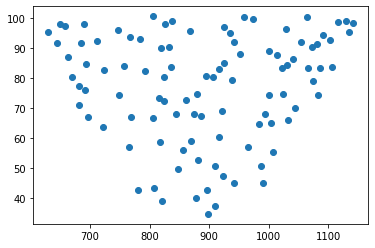

In [34]:
#plt.scatter(base[base["Image"]=="7_12_C"].head(10)[["Centroid X mum ", "Centroid Y mum"]])
plt.scatter(base[base["Image"]=="7_12_C"]["Centroid X mum"].head(100),base[base["Image"]=="7_12_C"]["Centroid Y mum"].head(100))

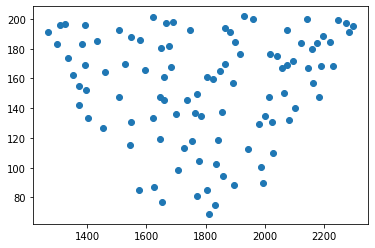

In [35]:
plt.scatter(d90s[d90s["Image"]=="7_12_C"]["cx"].head(100),d90s[d90s["Image"]=="7_12_C"]["cy"].head(100))

In [36]:
len(base)

53857

In [37]:
len(d90s)

53857

In [38]:
base=base.merge(d90s,on=["Image","global_id"])

In [41]:
base.sample()

,Image,global_id,Centroid X mum,Centroid Y mum,Cell: Area,Cell: Perimeter,Cell: Circularity,Cell: Max caliper,Cell: Min caliper,Cell: Eccentricity,Cell: DAPI mean,Cell: DAPI std dev,Cell: DAPI max,Cell: DAPI min,Cell: IBA1 mean,Cell: IBA1 std dev,Cell: IBA1 max,Cell: IBA1 min,Cell: Ki67 mean,Cell: Ki67 std dev,Cell: Ki67 max,Cell: Ki67 min,Cell: TMEM119 mean,Cell: TMEM119 std dev,Cell: TMEM119 max,Cell: TMEM119 min,Cell: NeuroC mean,Cell: NeuroC std dev,Cell: NeuroC max,Cell: NeuroC min,Cell: MBP mean,Cell: MBP std dev,Cell: MBP max,Cell: MBP min,Cell: mutIDH1 mean,Cell: mutIDH1 std dev,Cell: mutIDH1 max,Cell: mutIDH1 min,Cell: CD34 mean,Cell: CD34 std dev,Cell: CD34 max,Cell: CD34 min,Cell: GFAP mean,Cell: GFAP std dev,Cell: GFAP max,Cell: GFAP min,Cell: Autofluorescence mean,Cell: Autofluorescence std dev,Cell: Autofluorescence max,Cell: Autofluorescence min,Nucleus/Cell area ratio,geometry,cx,cy,12d90s,13d90s,14d90s,15d90s,16d90s,17d90s,18d90s,23d90s,24d90s,25d90s,26d90s,27d90s,28d90s,34d90s,35d90s,36d90s,37d90s,38d90s,45d90s,46d90s,47d90s,48d90s,56d90s,57d90s,58d90s,67d90s,68d90s,78d90s
31696,7_3_H,448,629.59,386.7,101.5,39.8432,0.8035,14.2347,9.2561,0.7895,0.5042,0.5256,2.1125,0.0,0.1204,0.4578,3.534,0.0,0.0266,0.0662,0.5181,0.0,0.0,0.0,0.0,0.0,5.5391,1.4414,9.7796,2.9152,2.7988,0.7838,5.2063,1.5015,1.8718,0.5196,3.2853,0.7233,0.0097,0.0172,0.1078,0.0,0.2947,0.2127,1.258,0.0931,3.4434,0.4788,4.8276,2.0386,0.4222,1268.02 766.44 1263.99 766.45 1257.69 771...,1269.117647,777.0,0.713285,0.966908,-5.47665,-4.657786,-1.241692,0.921596,0.429666,0.253623,-6.189936,-5.371072,-1.954978,0.208311,-0.283619,-6.443558,-5.624694,-2.2086,-0.045311,-0.537242,0.818864,4.234958,6.398247,5.906316,3.416094,5.579383,5.087452,2.163289,1.671358,-0.49193


In [40]:
base.drop(columns=["Unnamed: 0","index"],inplace=True)

In [42]:
base.to_csv("/home/leslie/Documents/Uppsala/TissueMapsAll/5papers/data/new20cores/allinfoonnewcores.csv")

# Now we are ready for inference! in the next notebook